<a href="https://colab.research.google.com/github/Sreenavya-04/AI/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SIMPLE LINEAR REGRESSION

GRADIENT DESCENT ALGORITHM

In [1]:
    !wget -O Gradient.jpg "https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/631731_P7z2BKhd0R-9uyn9ThDasA.webp"

--2025-06-26 10:14:54--  https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/631731_P7z2BKhd0R-9uyn9ThDasA.webp
Resolving cdn.analyticsvidhya.com (cdn.analyticsvidhya.com)... 104.26.7.19, 172.67.74.218, 104.26.6.19, ...
Connecting to cdn.analyticsvidhya.com (cdn.analyticsvidhya.com)|104.26.7.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14606 (14K) [image/webp]
Saving to: ‘Gradient.jpg’

Gradient.jpg        100%[===================>]  14.26K  --.-KB/s    in 0s      

2025-06-26 10:14:55 (97.2 MB/s) - ‘Gradient.jpg’ saved [14606/14606]



IMPORTS


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Problem Statement
>> to predict the height of a person based on weights
# New Section


# 2.Data Gathering


In [3]:
df=pd.read_csv("/content/SOCR-HeightWeight.csv")
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


# 3.EDA (EXPLORATORY DATA ANALYSIS)

1.   shape
2.   check for null or missing values
3.   Data types
4.   Unique Values
5.   Check for data Distribution

In [4]:
df.shape

(25000, 3)

In [5]:
df.info

<bound method DataFrame.info of        Index  Height(Inches)  Weight(Pounds)
0          1        65.78331        112.9925
1          2        71.51521        136.4873
2          3        69.39874        153.0269
3          4        68.21660        142.3354
4          5        67.78781        144.2971
...      ...             ...             ...
24995  24996        69.50215        118.0312
24996  24997        64.54826        120.1932
24997  24998        64.69855        118.2655
24998  24999        67.52918        132.2682
24999  25000        68.87761        124.8742

[25000 rows x 3 columns]>

In [6]:
df.isna().sum()

,0
Index,0
Height(Inches),0
Weight(Pounds),0


In [7]:
df.columns

Index(['Index', 'Height(Inches)', 'Weight(Pounds)'], dtype='object')

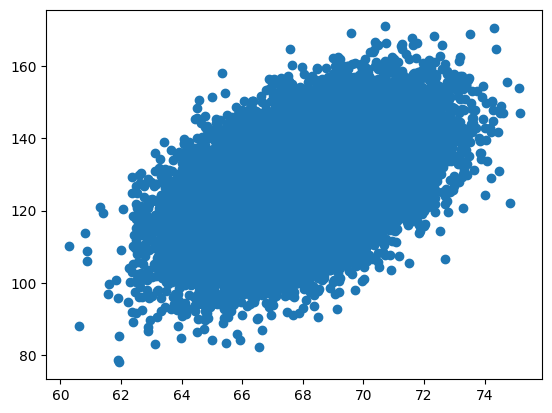

In [8]:
x=df[['Height(Inches)']]
y=df[['Weight(Pounds)']]
plt.scatter(x,y)
plt.show()

![image](https://www.investopedia.com/thmb/2b8kkUpoknl2tKdZfbsCzI-2X54=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/TC_3126228-how-to-calculate-the-correlation-coefficient-5aabeb313de423003610ee40.png)

In [9]:
#heatmap
df.corr()

,Index,Height(Inches),Weight(Pounds)
Index,1.000000,0.009626,-0.007257
Height(Inches),0.009626,1.000000,0.502859
Weight(Pounds),-0.007257,0.502859,1.000000


<Axes: >

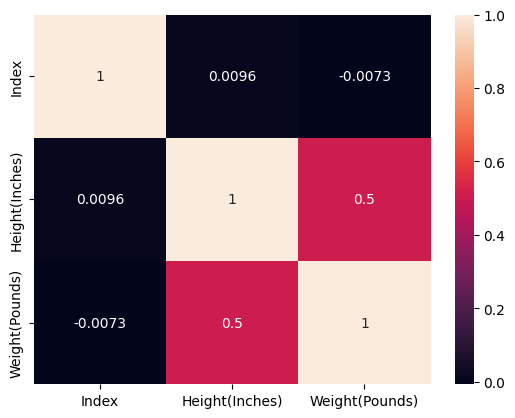

In [10]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

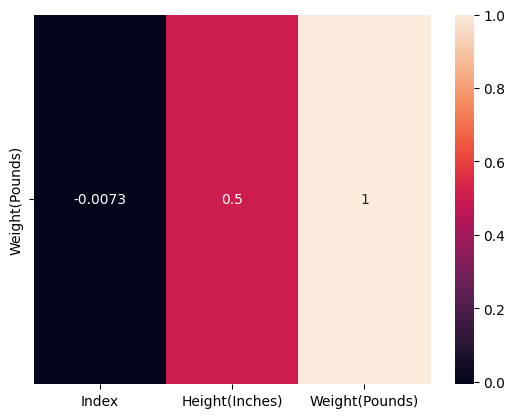

In [11]:
sns.heatmap(df.corr().tail(1),annot=True)

# Independence
check whether the Independent variable should not dependent on eachother

#  No multicolinearity
There should be no multiple correlation between independent feature
2.It hepls to avoid the multiple feature that are expecting the same task which will affect the target column

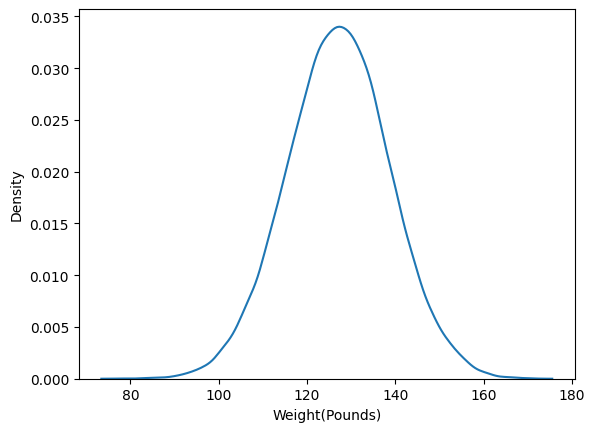

In [12]:
#To check Distributiom of the Data
sns.kdeplot(df['Weight(Pounds)'])
plt.show()

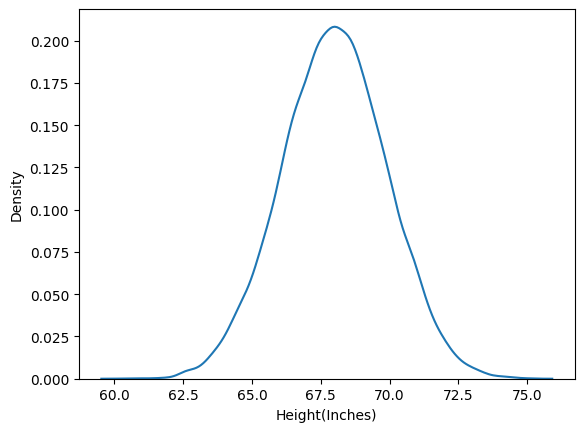

In [13]:
sns.kdeplot(df['Height(Inches)'])
plt.show()

In [14]:
#Statistical EDA
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,25000.0,12500.500000,7217.022701,1.00000,6250.750000,12500.50000,18750.250000,25000.0000
Height(Inches),25000.0,67.993114,1.901679,60.27836,66.704397,67.99570,69.272958,75.1528
Weight(Pounds),25000.0,127.079421,11.660898,78.01476,119.308675,127.15775,134.892850,170.9240


#Minimal Requirement for Machine Learning Model

1.   Data should be numeric
2.   Data should not have any missing values


# 5. Feature Engineering

Split data into Training and testing

In [16]:
from sklearn.model_selection import train_test_split



In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17500, 1), (7500, 1), (17500, 1), (7500, 1))

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7500, 1), (17500, 1), (7500, 1), (17500, 1))

In [24]:
x_train[:5]

,Height(Inches)
23450,69.56752
12724,62.70318
17274,68.43567
21291,66.69156
7716,68.26251


from matplotlib import pyplot as plt
_df_7['Height(Inches)'].plot(kind='hist', bins=20, title='Height(Inches)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Height(Inches)'].plot(kind='line', figsize=(8, 4), title='Height(Inches)')
plt.gca().spines[['top', 'right']].set_visible(False)

# 6. Model Training

In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression()

In [27]:
model.fit(x_train,y_train)

LinearRegression()

In [28]:
m=model.coef_
m

array([[3.12111006]])

In [29]:
c=model.intercept_
c

array([-85.11719248])

In [32]:
X=55
y=3.12111006 * X + -85.11719248

In [35]:
y

86.54386081999999

In [38]:
model.predict([[X]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[86.54386096]])

In [40]:
x_test

,Height(Inches)
20302,67.53817
12019,70.00114
20179,68.89269
764,70.88083
13617,68.59531
...,...
10988,66.51135
18556,68.89430
12448,70.57709
12045,67.21984


In [41]:
y_test

,Weight(Pounds)
20302,118.8005
12019,142.0097
20179,144.7230
764,134.9877
13617,128.7746
...,...
10988,110.2655
18556,131.6782
12448,131.9995
12045,126.4004


In [42]:
y_predict=model.predict(x_test)
y_predict

array([[125.67686951],
       [133.36406996],
       [129.90447551],
       ...,
       [135.1616733 ],
       [124.68332655],
       [127.47338046]])

In [43]:
y_test

,Weight(Pounds)
20302,118.8005
12019,142.0097
20179,144.7230
764,134.9877
13617,128.7746
...,...
10988,110.2655
18556,131.6782
12448,131.9995
12045,126.4004


In [44]:
residual=y_test - y_predict
residual

,Weight(Pounds)
20302,-6.876370
12019,8.645630
20179,14.818524
764,-1.121979
13617,-0.201720
...,...
10988,-12.206551
18556,1.768699
12448,-3.162173
12045,1.717073
